<a href="https://colab.research.google.com/github/dave21-py/Siri-project/blob/main/dlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
file_path = 'siri_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
print("Dataset loaded successfully! Here are the first 5 rows:")
print(df.head())

Dataset loaded successfully! Here are the first 5 rows:
                                   utterance                intent  Unnamed: 2
0             What's the weather like today?  Weather_Get_forecast         NaN
1         Tell me the forecast for New York.  Weather_Get_forecast         NaN
2                     Will it rain tomorrow?  Weather_Get_forecast         NaN
3  How hot is it going to be this afternoon?  Weather_Get_forecast         NaN
4               Do I need to bring a jacket?  Weather_Get_forecast         NaN


In [ ]:
print("Missing rows for cleaning:")
print(df.isnull().sum())

Missing rows for cleaning:
utterance      0
intent         0
Unnamed: 2    60
dtype: int64


In [ ]:
df = df[['utterance','intent']]

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,utterance,intent
0,What's the weather like today?,Weather_Get_forecast
1,Tell me the forecast for New York.,Weather_Get_forecast
2,Will it rain tomorrow?,Weather_Get_forecast
3,How hot is it going to be this afternoon?,Weather_Get_forecast
4,Do I need to bring a jacket?,Weather_Get_forecast


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df['utterance']
y = df['intent']
label_encoder = LabelEncoder()

In [ ]:
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 42)

In [ ]:
print("Data prep complete")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_test.shape)
print("Shape of y_test:", y_test.shape)

Data prep complete
Shape of X_train: (48,)
Shape of X_test: (12,)
Shape of y_train: (12,)
Shape of y_test: (12,)


In [ ]:
print(y[0])
print(y_encoded[0])

Weather_Get_forecast
4


In [ ]:
# Vectorisation
# list of numbers(TFIDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #text into numerical vectors
from sklearn.linear_model import LogisticRegression #fast classification model
from sklearn.pipeline import Pipeline #pipeline will let us chain

In [ ]:
# Pipeline, step tfidf and logistic regression

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter = 1000))
])

In [ ]:
print('Training base model')
pipeline.fit(X_train, y_train)
print('Training complete!')

Training base model
Training complete!


In [ ]:
# Evaluating our model
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Making predictions on the test data.....")
predictions = pipeline.predict(X_test)

Making predictions on the test data.....


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Baseline model accuracy: {accuracy * 100:.2f}%")

Baseline model accuracy: 66.67%


In [ ]:
# Generate a detailed classification report
print("Detailed classification report......")
report = classification_report(y_test, predictions, target_names = label_encoder.classes_)
print(report)

Detailed classification report......
                       precision    recall  f1-score   support

   Calendar_Set_event       1.00      0.33      0.50         3
      Clock_Set_timer       0.67      1.00      0.80         2
 Maps_Set_destination       0.25      1.00      0.40         1
Messages_Send_message       1.00      0.50      0.67         4
 Weather_Get_forecast       1.00      1.00      1.00         2

             accuracy                           0.67        12
            macro avg       0.78      0.77      0.67        12
         weighted avg       0.88      0.67      0.68        12



In [ ]:
sentence = 'What is the temperate outside right now?'
def predict_intent(sentence):
  prediction = pipeline.predict([sentence])
  predicted_index = prediction[0]
  predicted_intent = label_encoder.inverse_transform([predicted_index]) # turns back to text
  return predicted_intent[0]


In [ ]:
# --- Let's test it! ---
# Try some sentences the model has seen before or similar ones.
test_sentence_1 = "Set a timer for 30 seconds"
print(f"Sentence: '{test_sentence_1}'")
print(f"Predicted Intent: {predict_intent(test_sentence_1)}")

Sentence: 'Set a timer for 30 seconds'
Predicted Intent: Clock_Set_timer


In [ ]:
test_sentence_2 = "What is the temperate outside right now?"
print(f"Sentence: '{test_sentence_2}'")
print(f"Predicted Intent: {predict_intent(test_sentence_2)}")

Sentence: 'What is the temperate outside right now?'
Predicted Intent: Weather_Get_forecast


In [ ]:
test_sentence_3 = "Book a flight to Dallas, Texas."
print(f"Sentence: '{test_sentence_3}'")
print(f"Predicted Intent: {predict_intent(test_sentence_3)}")

Sentence: 'Book a flight to Dallas, Texas.'
Predicted Intent: Maps_Set_destination


In [ ]:
# Building deep learning model to beat 66.7%

In [ ]:
# LSTM uses word embeddings, each word rep. by vector of numbers. words with similar meannigs will have similar vectors. This allows the model to understand context and nuance better.

In [ ]:
# Preparation data for Deep learning: Tokenisation and Padding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
# Settings
vocab_size = 1000 # max. no of unique words
max_length = 20
oov_token = "<OOV>" # special token to use for words that are not in dictionary

In [ ]:
# Create and fit the tokenizer on our training text

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert the training and text text into numerica sequence
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Padding the sequences so that they have same length

In [ ]:
X_train_padded = pad_sequences(X_train_sequences, maxlen = max_length, padding = 'post')
X_test_padded = pad_sequences(X_test_sequences, maxlen = max_length, padding = 'post')

In [ ]:
# Lets check our work

In [ ]:
print("Original sentence:", X_train.iloc[0])
#Now its new padded numerical sequence
print("Padded sequence:", X_train_padded[0])
print("Data is now ready for deep learning model")

Original sentence: I need to go to the grocery store.
Padded sequence: [ 7  8  2 60  2  3 61 62  0  0  0  0  0  0  0  0  0  0  0  0]
Data is now ready for deep learning model


    The most frequent word might get the number 1, the second most frequent 2, and so on.

    Based on your training data, the tokenizer learned this mapping (these are just examples):

        to -> 2

        the -> 3

        I -> 7

        need -> 8

        go -> 60

        grocery -> 61

        store -> 62

 Padding (Making All Messages the Same Length)

Neural networks are like highly organized machines. They require every piece of input data to be the exact same size. Our sentences have different lengths, which is a problem.

    We set a max_length of 20.

    Your coded sentence [7, 8, 2, 60, 2, 3, 61, 62] has only 8 numbers.

    To make it 20 numbers long, the process simply added 12 zeros at the end. Zeros are the standard "padding" value, meaning "nothing here."

Build the LSTM Model

It's time to design our "Family Sedan." We will now define the architecture of our LSTM neural network. A model's architecture is like a blueprint that specifies the different layers and how they connect to each other.

Our model will have three main layers:

    Embedding Layer: This is the most important layer. It will take our padded sequences of numbers (like [7, 8, 2, ...]) and convert them into dense "embedding" vectors. This is where the model learns the meaning and relationships between words.

    LSTM Layer: This is the core of the model. It processes the sequence of word embeddings, looking for patterns and remembering the context of the sentence over time.

    Dense (Output) Layer: This is the final layer. It takes the information from the LSTM and makes the final prediction, choosing which of our 5 intents is the most likely.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
# Get the number of unique classes/intents

In [ ]:
num_classes = len(set(y_encoded))

In [ ]:
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 16, input_shape = (max_length,)),
    LSTM(32),
    Dense(num_classes, activation='softmax') # softmax converts the output into a probability dis, so we can see how confident the model is for each intent.
])

In [ ]:
# Compile the Model

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Print the summary of the model's architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 16)         │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,437 (87.64 KB)

 Trainable params: 22,437 (87.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 50
# Training process

In [ ]:
print("Retraining after achieved still val_accuracy,  the training of LSTM model....")
history = model.fit(
    X_train_padded,
    y_train,
    epochs = num_epochs,
    validation_data = (X_test_padded, y_test)
)
print("Training Complete!")

Retraining after achieved still val_accuracy,  the training of LSTM model....
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.2361 - loss: 1.6053 - val_accuracy: 0.0833 - val_loss: 1.6232
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2257 - loss: 1.6036 - val_accuracy: 0.0833 - val_loss: 1.6256
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.2569 - loss: 1.6033 - val_accuracy: 0.0833 - val_loss: 1.6278
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.2465 - loss: 1.6010 - val_accuracy: 0.0833 - val_loss: 1.6300
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.2361 - loss: 1.6020 - val_accuracy: 0.0833 - val_loss: 1.6320
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.2465 - loss: 1.5988 - val_accuracy: 0.0833 - val_loss: 1.6344
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.2257 - loss: 1.6001 - val_accuracy: 0.2500 - val_loss: 1.6366
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get the accuracy values from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
# Get the loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Get the no. of epochs the model was trained for
epochs_range = range(len(acc))

In [ ]:
plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

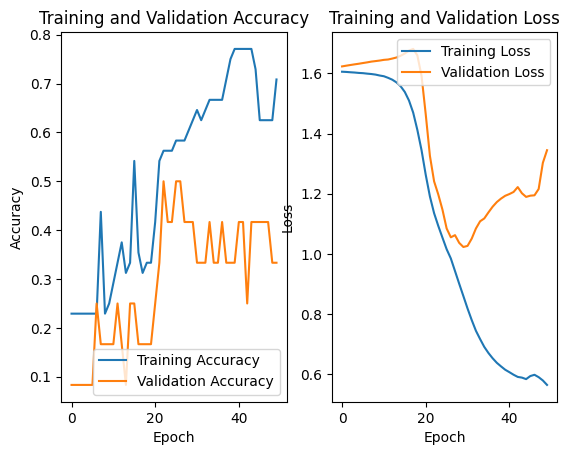

In [90]:
# Subplot 1: Accuracy
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Subplot 2: Loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
# Measure the final performance metrics

In [91]:
# Final analysis for inference time and model size

In [92]:
import time
import os
import joblib

In [93]:
# Measure the baseline model performance
# First, save the trained pipeline to a file
baseline_filename = 'baseline_model.joblib'
joblib.dump(pipeline, baseline_filename)

['baseline_model.joblib']

In [94]:
# Now calculating the model's size on disk
baseline_size_kb = os.path.getsize(baseline_filename) / 1024

In [95]:
# Time the inference speed

In [97]:
start_time = time.time()
pipeline.predict(X_test) #Make predictions on the whole test set
end_time = time.time()
baseline_inference_time_ms = ((end_time - start_time) / len(X_test) * 1000) #Avg time in miliseconds

In [99]:
print("Baseline model-----------")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Model Size: {baseline_size_kb:.2f} KB")
print(f"Average Inference Time: {baseline_inference_time_ms:.4f} ms per sentence")

Baseline model-----------
Accuracy: 66.67%
Model Size: 12.08 KB
Average Inference Time: 1.7664 ms per sentence


In [100]:
# Now LSTM Model Performance

In [101]:
lstm_filename = 'lstm_model.keras'
model.save(lstm_filename)

In [104]:
# Calculate the models's size
lstm_size_kb = os.path.getsize(lstm_filename) / 1024

In [105]:
# Time the inference speed

In [106]:
start_time = time.time()
model.predict(X_test_padded) #Make predictions on the whole test set
end_time = time.time()
lstm_inference_time_ms = ((end_time - start_time) / len(X_test_padded) * 1000) #Avg time in miliseconds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


In [107]:
# We will use peak validation accuracy
peak_lstm_accuracy = 0.50

In [108]:
print("LSTM model-----------")
print(f"Best Accuracy: {peak_lstm_accuracy * 100:.2f}% (before overfitting)")
print(f"Model Size: {lstm_size_kb:.2f} KB")
print(f"Average Inference Time: {lstm_inference_time_ms:.4f} ms per sentence")

LSTM model-----------
Best Accuracy: 50.00% (before overfitting)
Model Size: 290.09 KB
Average Inference Time: 64.9985 ms per sentence
